## **Visualize Articles**

This Python Notebook reads in a Google Sheets document (or csv) containing  deduplicated results from Scopus and Google Scholar on the topic of GIS methods in Food Systems Research.

Results are filtered to those articles that were screened as relevant, and then visualizations are created to summarize bibliometric information, including authorship, journal, year of publication, and so on.

### Set Up

In [ ]:
# import libraries

import copy
import spacy
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
warnings.simplefilter(action='ignore', category=FutureWarning)

### Functions

In [ ]:
# function to access data from google sheet or csv

# source: google colab
# prompt: read in a sheet from a google sheet
# modified by author

def read_data(source = 'Articles_GISinFoodSystemsResearch', method = 'googlesheet'):
  '''
  source: name of the google sheet or path to csv file
  method: googlesheet or csv
  '''

  if method == 'googlesheet':

    !pip install --upgrade gspread

    from google.colab import auth
    auth.authenticate_user()

    import gspread
    from google.auth import default
    creds, _ = default()

    gc = gspread.authorize(creds)

    worksheet = gc.open(source).sheet1
    # worksheet = gc.open(source).worksheet(sheetname)
    rows = worksheet.get_all_values()
    headers = rows.pop(0)
    rawdf = pd.DataFrame(rows, columns=headers)

  elif method == 'csv':
    rawdf = pd.read_csv(source)

  else:
    raise ValueError("Method must be 'googlesheet' or 'csv'")

  return rawdf

In [ ]:
# function to get article counts based on a field

def get_counts(df, field):
  # Group by field and count the number of rows
  counts = df.groupby(field).size()
  return counts

In [ ]:
# function to chart counts in a line graph

def chart_counts_line(df, field, save=False):
  counts = get_counts(df, field)
  counts.plot(kind='line')
  plt.xlabel(field)
  plt.ylabel('Article Count')
  plt.title(f'GIS and Food Systems Research - by {field}')
  if save:
    plt.savefig(f'{field}.png')
  plt.show()
  return counts

In [ ]:
# function to chart counts in a bar graph

def chart_counts_hbar(df, field, max_num=27, save=False, normalize=False):
    if field == 'Journal':
        f2 = 'Source title'
    else:
        f2 = field
    counts = get_counts(df, f2).sort_values(ascending=False)
    if normalize:
        total = counts.sum()
        counts = counts / total
        xlabel = 'Proportion of Articles'
    else:
        xlabel = 'Article Count'
    counts[:max_num].plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel)
    plt.ylabel(field)
    plt.title(f'GIS and Food Systems Research - by {field}')
    if save:
        plt.savefig(f'{field}{"_normalized" if normalize else ""}.png')
    plt.show()
    return counts


In [ ]:
# function to extract locations using spacy
nlp = spacy.load("en_core_web_sm")

def extract_locations(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    return locations

### Modify fonts (optional)

In [ ]:
!sudo apt install msttcorefonts -qq

The following additional packages will be installed:
  cabextract distro-info libmspack0 python3-chardet python3-debconf
  python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ubuntu-advantage-tools ubuntu-pro-client
  ubuntu-pro-client-l10n ubuntu-release-upgrader-core update-manager-core
  update-notifier-common xfonts-encodings xfonts-utils zstd
Suggested packages:
  shunit2
The following NEW packages will be installed:
  cabextract distro-info libmspack0 python3-chardet python3-debconf
  python3-debian python3-distro-info python3-distupgrade
  python3-update-manager python3-yaml ttf-mscorefonts-installer
  ubuntu-advantage-tools ubuntu-pro-client ubuntu-pro-client-l10n
  ubuntu-release-upgrader-core update-manager-core update-notifier-common
  xfonts-encodings xfonts-utils zstd
0 upgraded, 20 newly installed, 0 to remove and 41 not upgraded.
Need to get 2,364 kB of archives.
After this operation, 9,974 kB of additional disk space will be used

In [ ]:
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# If you installed the font using apt-get
font_dir = '/usr/share/fonts/truetype/msttcorefonts'
font_files = font_manager.findSystemFonts(fontpaths=font_dir)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Set Times New Roman as the default font
plt.rcParams['font.family'] = 'Times New Roman'

### Access Relevant Articles

In [ ]:
# access relevant articles
rawdf = read_data(source = 'Articles_GISinFoodSystemsResearch', method = 'googlesheet')
reldf = copy.deepcopy(rawdf[rawdf['FINAL_RELEVANCE']=='TRUE'])

## Date of Publication

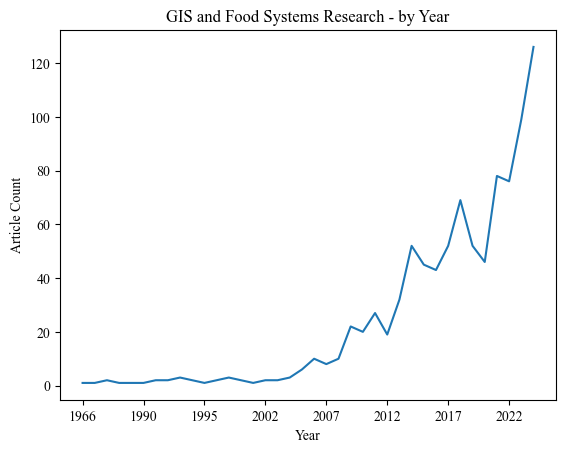

,0
Year,
1966,1
1985,1
1986,2
1987,1
1988,1
1990,1
1991,2
1992,2
1993,3


In [ ]:
chart_counts_line(reldf, field='Year')

## Journal Title

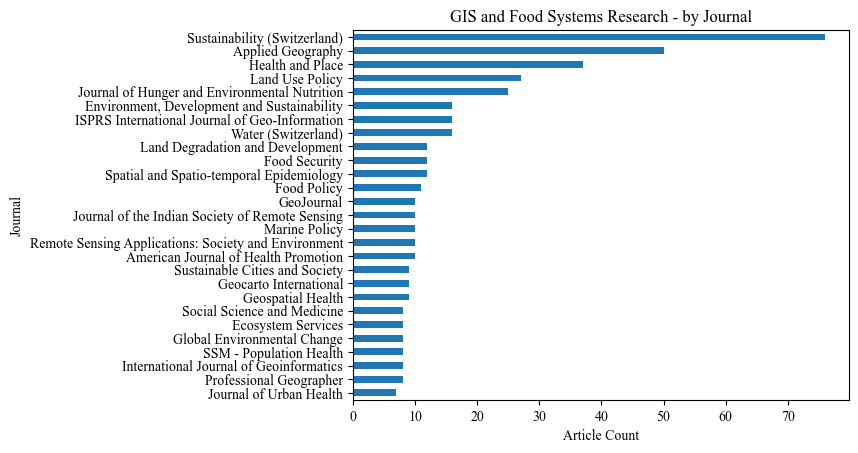

,0
Source title,
Sustainability (Switzerland),76
Applied Geography,50
Health and Place,37
Land Use Policy,27
Journal of Hunger and Environmental Nutrition,25
...,...
Theoretical and Empirical Researches in Urban Management,1
Tobacco Control,1
Transactions of the Institute of Indian Geographers,1


In [ ]:
chart_counts_hbar(reldf, 'Journal')

In [ ]:
# articles from top 5 journals
journal_df = get_counts(reldf, 'Source title')
journal_df=journal_df.sort_values(ascending=False)
top5 = journal_df.head(5).sum()
total = journal_df.sum()
print(f'Articles from top 5 journals: {top5} | {top5/total}')

Articles from top 5 journals: 215 | 0.2326839826839827


In [ ]:
# articles from journals with >= 7 articles
journal_df[journal_df>=7].shape[0]
journ7 = journal_df[5:29].sum()
print(f"{journ7} | {journ7/total}")

# articles from journals with 1-6 articles
journrest = journal_df[29:].sum()
print(f"{journrest} | {journrest/total}")

241 | 0.26082251082251084
468 | 0.5064935064935064


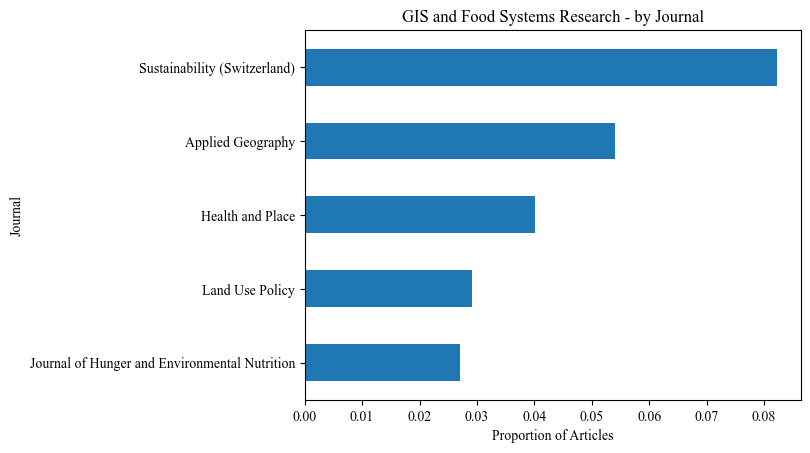

,0
Source title,
Sustainability (Switzerland),0.082251
Applied Geography,0.054113
Health and Place,0.040043
Land Use Policy,0.029221
Journal of Hunger and Environmental Nutrition,0.027056
...,...
Theoretical and Empirical Researches in Urban Management,0.001082
Tobacco Control,0.001082
Transactions of the Institute of Indian Geographers,0.001082


In [ ]:
# normalize by article count
chart_counts_hbar(reldf, 'Journal', max_num=5, normalize=True)

## Author

In [ ]:
# prompt: extract all author names from rawdf['Authors'] and list them in order of number of rows they appear in

author_counts = Counter()
for authors_str in reldf['Authors']:
    authors = [author.strip() for author in authors_str.split(',')]
    for author in authors:
        author_counts[author] += 1

sorted_authors = sorted(author_counts.items(), key=lambda item: item[1], reverse=True)
authdf = pd.DataFrame(sorted_authors, columns=['Author', 'Articles'])
adf = authdf[authdf['Articles'] > 2].sort_values(by=['Articles','Author'], ascending=[False,True])
adf

# Group by number of Articles and aggregate Authors into a list
adf_grouped = adf.groupby('Articles')['Author'].apply(list).reset_index()
adf_grouped.sort_values(by='Articles', ascending=False)
# print(", ".join(adf_grouped[adf_grouped['Articles']==7]['Author'][4]))

,Articles,Author
4,7,"[Li Y., Yang X.]"
3,6,[Li J.]
2,5,"[Ahamed T., Gordon-Larsen P., Kawachi I., Liu ..."
1,4,"[Ahmad F., Ammerman A.S., Burgoine T., Chen Z...."
0,3,"[Ahmed S., Aldosari A.A., Boone-Heinonen J., E..."


In [ ]:
print(f'Total authors: {len(sorted_authors)}')
print(f"Authors with 2 articles: {authdf[authdf['Articles'] == 2].shape[0]}")

Total authors: 3489
Authors with 2 articles: 242



## Location - study area

In [ ]:
# add search text column to combine title, abstract, and keyword columns

reldf["search_text"] = reldf["Title"] + " " + reldf["Abstract"] + " " + reldf["Author Keywords"] + " " + reldf["Index Keywords"]

In [ ]:
# use nlp to extract locations

reldf["spacy"] = reldf["search_text"].apply(extract_locations)

# count of articles with at least one location

count = reldf['spacy'].apply(lambda x: x != []).sum()
count

np.int64(804)

In [ ]:
# prompt: remove duplicates within a single cell in locdf['locations'] and unnest each list

reldf['spacy'] = reldf['spacy'].apply(lambda x: list(set(item for sublist in x for item in sublist.split(', ') if sublist)))
reldf['spacy'] = reldf['spacy'].apply(lambda x: list(item.replace('\n',' ') for item in x))
reldf['spacy'] = reldf['spacy'].apply(', '.join)
reldf['spacy']

,spacy
2,"France, Italy"
4,"Crops, OA"
5,
6,"Luxembourg, England, Italy, Spain, Switzerland..."
7,"Italy, MRT, ST"
...,...
1252,
1253,
1254,Farmland
1255,Italy


In [ ]:
# check for manually-coded REGION column and use it, if it exists:

if 'col1' in reldf.columns:
  reldf['locations'] = np.where(reldf['REGION'] != '', reldf['REGION'], reldf['spacy'])
else:
  reldf['locations'] = reldf['spacy']

#reldf.head(70)

In [ ]:
# count blanks

print(f"REGION: {reldf[reldf['REGION'] == ''].shape[0]}")
print(f"spacy: {reldf['spacy'].apply(lambda x: x == '').sum()}")
print(f"locations: {reldf['locations'].apply(lambda x: x == '').sum()}")

REGION: 707
spacy: 120
locations: 120


## Location - author affiliation

In [ ]:
# Group by year and count the number of rows

def get_country(lst):
  if lst and lst[-1]:
    return lst[-1]
  else:
    return ''

reldf['AffCountry'] = reldf['Affiliations'].str.split(',').apply(get_country)

reldf.head()

,Authors,Author(s) ID or Google Scholar ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,REL_INITIALMANUALCODING,REL_LULCMANUALCODING,REL_SPOTCHECK,PYTHON RELEVANCE,PYTHON REASON,FINAL_RELEVANCE,search_text,spacy,locations,AffCountry
2,"Marshall L., Leclercq N., Weekers T., El Abdou...",56883862500;57218380040;57221174435;5722253125...,Potential for climate change driven spatial mi...,2023,Global Environmental Change,83,,102742,,,...,TRUE,,,,LULC,TRUE,Potential for climate change driven spatial mi...,"France, Italy","France, Italy",Belgium
4,"Faqe Ibrahim G.R., Rasul A., Abdullah H.",57744962700;56966434500;57196186015;,Improving Crop Classification Accuracy with In...,2023,Journal of Geovisualization and Spatial Analysis,7,2,22,,,...,TRUE,,,TRUE,,TRUE,Improving Crop Classification Accuracy with In...,"Crops, OA","Crops, OA",Netherlands
5,"Vigneshwaran S., Tamburi V.N.",57200310219;58490523000;,Identification of coconut palm trees using sin...,2023,Spatial Information Research,31,6,,695,707,...,TRUE,,,TRUE,,TRUE,Identification of coconut palm trees using sin...,,,India
6,"Hoenink J.C., Huang Y., Keeble M., Mackenbach ...",57203023251;57208279023;57208481817;5537245880...,Socioeconomic distribution of food outlet avai...,2023,Health and Place,84,,103135,,,...,TRUE,,,TRUE,,TRUE,Socioeconomic distribution of food outlet avai...,"Luxembourg, England, Italy, Spain, Switzerland...","Luxembourg, England, Italy, Spain, Switzerland...",Netherlands
7,"Guerri G., Crisci A., Morabito M.",57219009108;35964166000;9250297100;,Urban microclimate simulations based on GIS da...,2023,Building and Environment,245,,110854,,,...,TRUE,,,TRUE,,TRUE,Urban microclimate simulations based on GIS da...,"Italy, MRT, ST","Italy, MRT, ST",Italy


In [ ]:
reldf.to_csv('reldf.csv')